# Smoking Analysis

Sklearn can be very useful for data analysis in Python/Jupyter

## Information obtained from Kaggle

#### Project done by Miguel Estrada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the data
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [3]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of children per person')

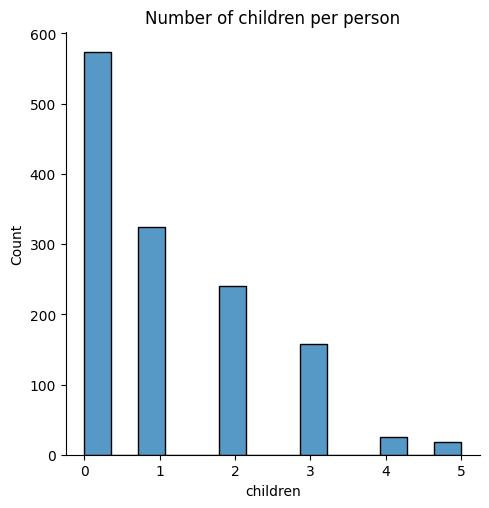

In [8]:
sns.displot(insurance_df['children'], kde=False)
plt.title("Number of children per person")

<Axes: xlabel='age', ylabel='children'>

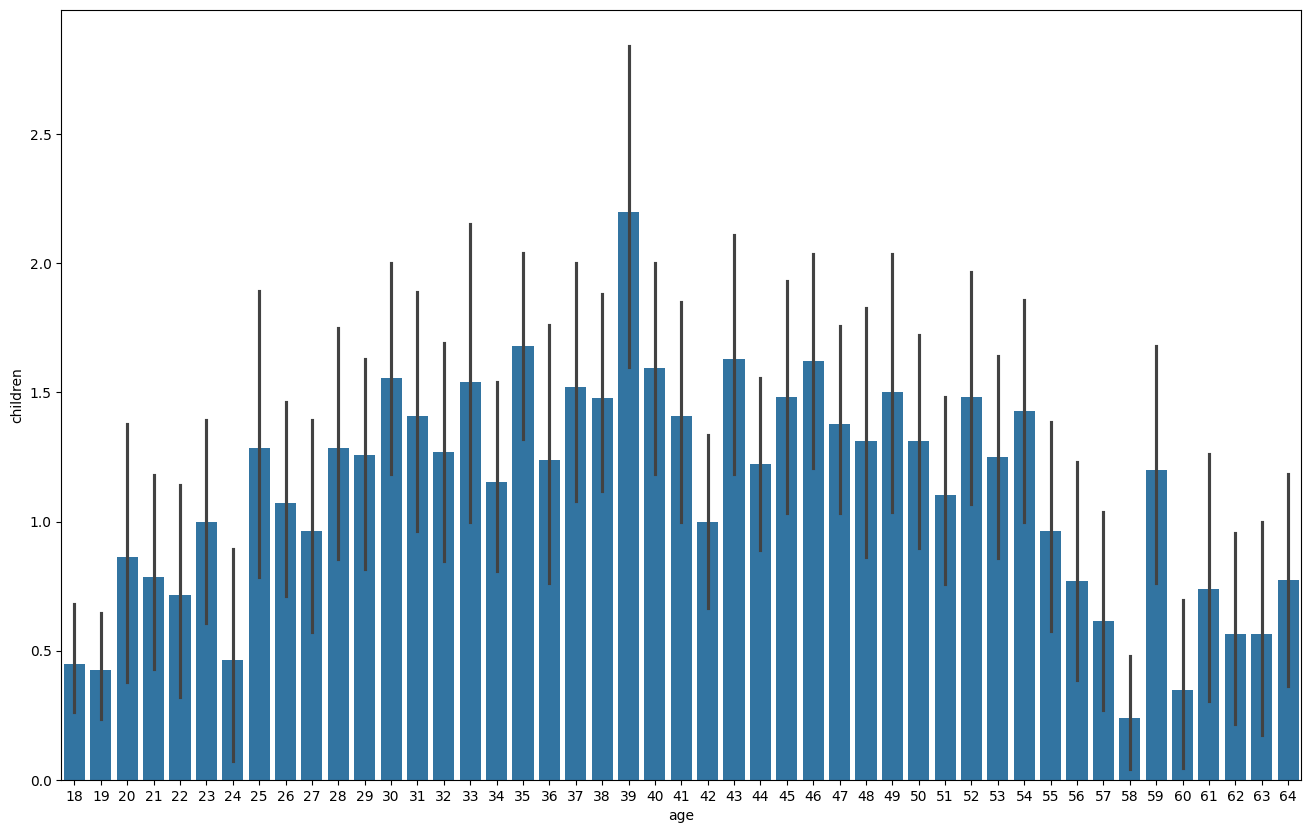

In [9]:
plt.figure(figsize=(16, 10))
sns.barplot(x=insurance_df['age'], y=insurance_df['children'])

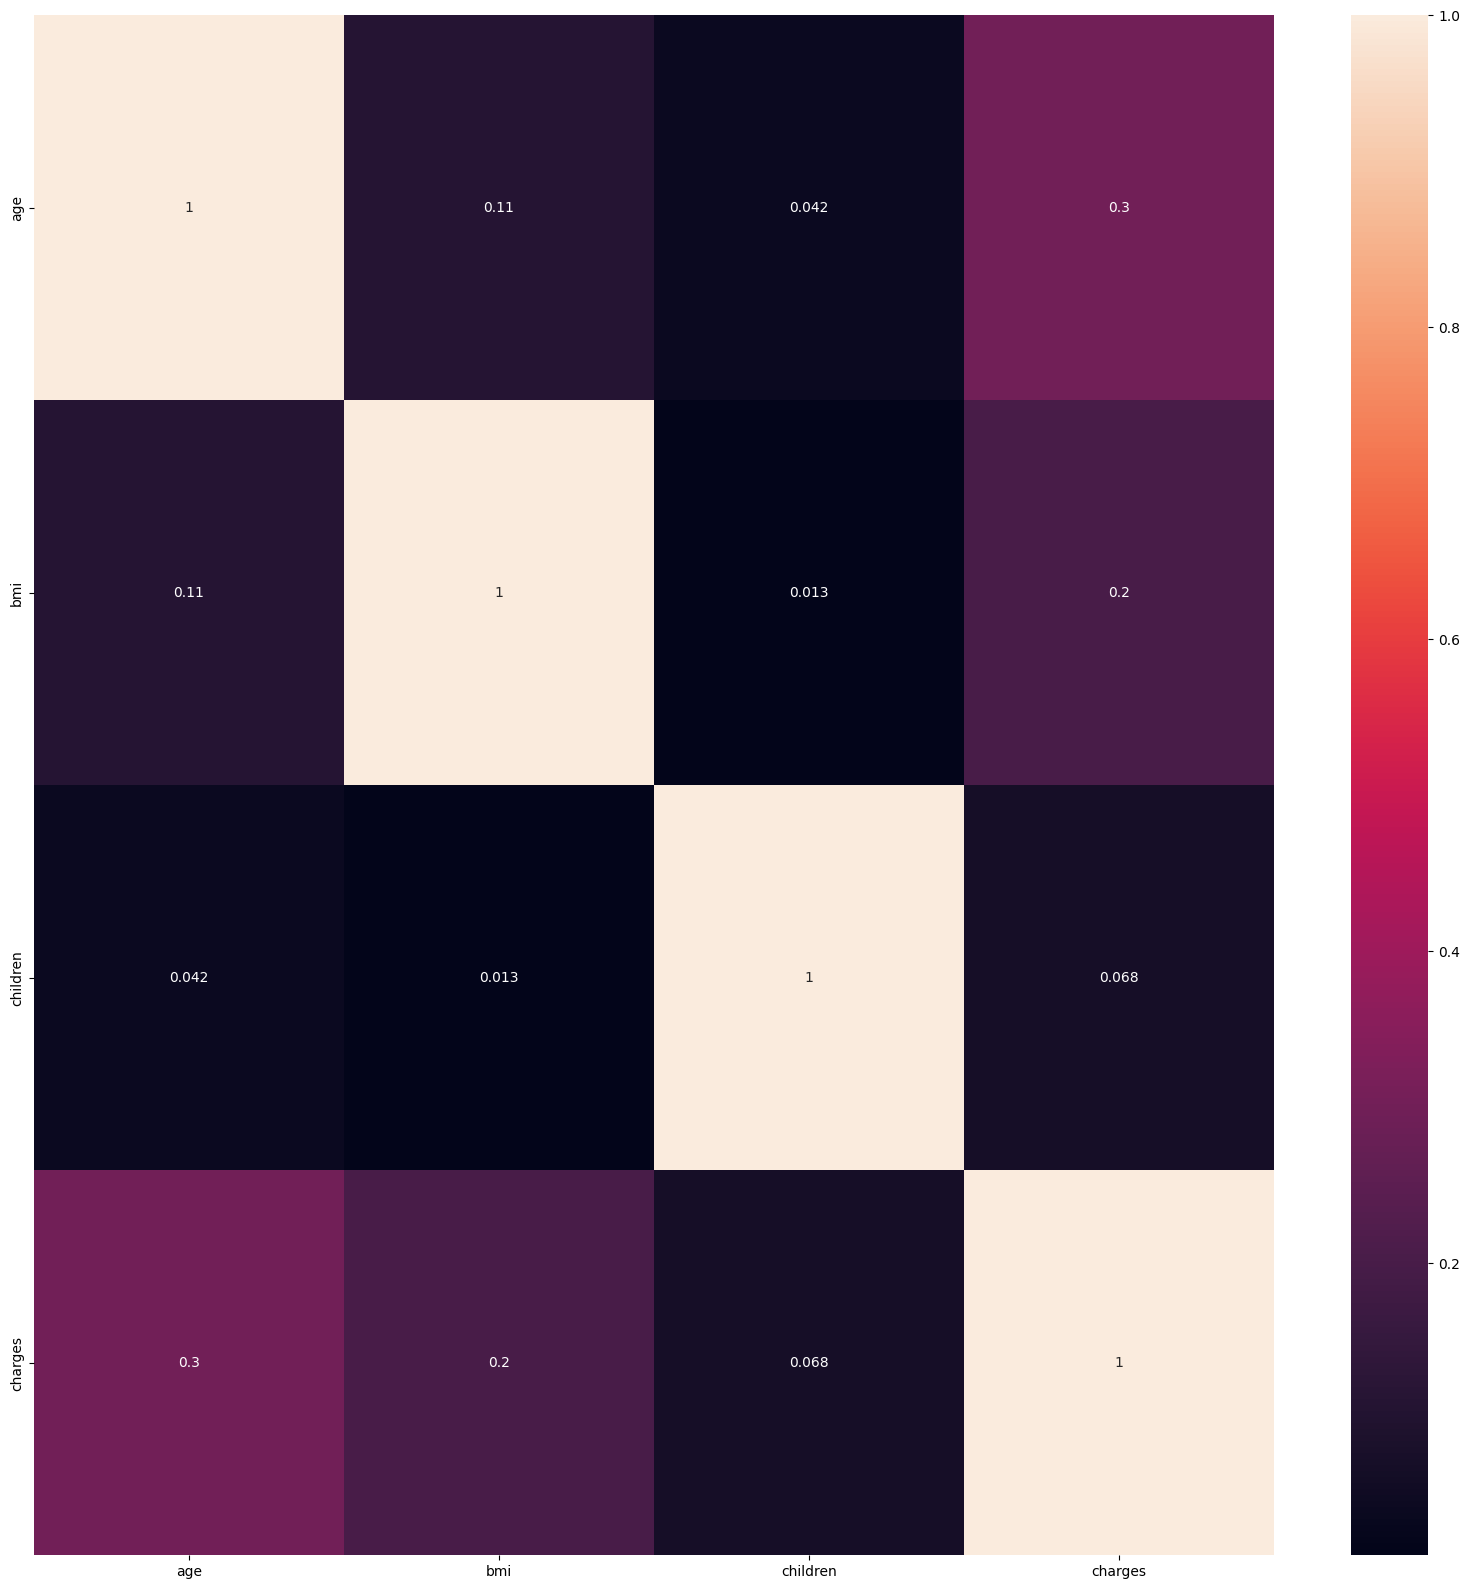

In [12]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
corr_matrix = insurance_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot = True)
plt.show()

#### Preparing data for Logistic Regression
Used for predicting if a person is a smoker or not based on their insurance and other data

In [10]:
X = insurance_df.drop('charges', axis=1)
Y = insurance_df['charges']

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Y = np.array(Y)

X.region = labelencoder.fit_transform(X.region.values)
X.sex = labelencoder.fit_transform(X.sex.values)
X.smoker = labelencoder.fit_transform(X.smoker.values)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [19]:
# Train an XGBoost regressor model 
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [20]:
predictions = model.predict(x_test)

In [21]:
result = model.score(x_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.8400903468363374


In [22]:
# make predictions on the test data
y_predict = model.predict(x_test)
y_predict

array([ 9349.209 ,  5686.6807, 42505.074 ,  5693.8804, 21650.514 ,
        1477.66  ,  9978.347 ,  8162.3955, 11741.1045, 43873.023 ,
        7327.9917,  9043.423 , 11592.012 ,  3076.9885, 26771.176 ,
       12964.113 ,  4796.112 , 47627.56  ,  3675.1194, 14380.23  ,
        4870.116 , 16307.216 , 40704.918 ,  6087.7725, 35334.258 ,
        8017.6885, 11343.724 , 28180.344 ,  1913.0421, 11548.804 ,
       20504.855 ,  6700.855 ,  6922.0986,  6736.578 ,  9270.323 ,
        1695.1538,  9602.659 ,  3478.1   ,  8526.345 ,  9027.197 ,
       10955.944 ,  7044.5947,  5171.317 , 17856.865 ,  2079.7183,
       10882.842 , 12074.027 , 11151.639 , 28406.37  ,  3320.769 ,
       41307.95  , 13265.413 ,  6567.3457,  5212.988 ,  9989.205 ,
        7271.0254, 22102.25  , 11226.934 , 12292.382 ,  4862.138 ,
       24997.332 ,  2832.5479,  4382.803 ,  2736.248 , 10029.969 ,
       12778.405 ,  2294.1973,  6016.505 , 12093.093 , 34010.35  ,
        4967.737 , 10083.964 ,  6430.128 , 16850.725 ,  6796.7

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = x_test.shape[1]
n = len(x_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 4564.719 
MSE = 20836661.32494452 
MAE = 2318.140882484171 
R2 = 0.8400903468363374 
Adjusted R2 = 0.8364142628555635
